In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lem=WordNetLemmatizer()
import seaborn as sn
import scipy.stats as st
import re
from collections import Counter
from wordcloud import WordCloud
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier
%pylab inline
x, y = np.ogrid[100:500, :600]
mask = ((x - 300)/2) ** 2 + ((y - 300)/3) ** 2 > 100 ** 2
mask = 255 * mask.astype(int)


Populating the interactive namespace from numpy and matplotlib


In [2]:
data=pd.read_csv('data.csv',sep='\t',index_col='UniqueID',decimal=',')
data2=pd.read_csv('data.csv',sep='\t',index_col='UniqueID',decimal=',')
question=pd.read_csv('questions.csv',sep='\t',index_col=None).T
question

,0,1,2,3
Idquest,question,parent,type,Treatment
Unnamed: 1,UNIQUE ID,NaN,NaN,NaN
Unnamed: 2,start,NaN,NaN,NaN
Unnamed: 3,end,NaN,NaN,NaN
Unnamed: 4,today,NaN,NaN,NaN
...,...,...,...,...
waterconsumed_per_pers,Average water consumption per person,NaN,continue,NaN
schooled_boys_ %,Pourcentage boys 6 to 11 in school,>boys6to11,continue,NaN
schooled_girls_ %,Pourcentage girls 6 to 11 in school,>girls6to11,continue,NaN
schooled_boys2_ %,Pourcentage boys 12 to 17 in school,>boys12to17,continue,NaN


In [3]:
coding=pd.read_csv('coding.csv',sep='\t',decimal=',')
coding

,list name,name,label,cf,code,color
0,Consent,1,Yes,NaN,NaN,NaN
1,Consent,2,No,NaN,NaN,NaN
2,emailconsent,1,Yes,NaN,NaN,NaN
3,emailconsent,2,No,NaN,NaN,NaN
4,yesno,1,Yes,NaN,NaN,NaN
...,...,...,...,...,...,...
818,NaN,NaN,NaN,NaN,NaN,NaN
819,phonecallstatus,1,Phone not ringing,NaN,NaN,NaN
820,phonecallstatus,2,Phone ringing but not answered.,NaN,NaN,NaN
821,phonecallstatus,3,Respondent answered but refused the interview,NaN,NaN,NaN


In [4]:
coding.dropna(how='all',subset=['code','color'])

,list name,name,label,cf,code,color
11,gender,1,Male,NaN,1.0,Blue
12,gender,2,Female,NaN,0.0,Pink
13,region,somaliland,Somaliland,NaN,NaN,yellow
14,region,jubaland,Jubaland,NaN,NaN,blue
15,region,puntland,Puntland,NaN,NaN,red
...,...,...,...,...,...,...
595,treatment,4,Other,NaN,888.0,grey
779,servicedelivery,1,Poor,NaN,-1.0,red
780,servicedelivery,2,Average,NaN,0.0,yellow
781,servicedelivery,3,Good,NaN,1.0,green


In [5]:
coding.to_csv('./DashBoard/codes.csv',sep='\t',index=None)

In [6]:
data=data[[i for i in data.columns if 'Unnamed' not in i]]
data.shape

(99, 577)

In [7]:
data

,latitude,longitude,targetlocation,clan,gender resp,age resp,residence,hosting,livingduration,marriage,...,noserviceaccess Young people,noserviceaccess Speciﬁc ethnic groups,noserviceaccess Other,covid,quarantine,admitted,pass,jobloss,region,district
UniqueID,,,,,,,,,,,,,,,,,,,,,
1,3.119052,43.658621,0,Harin,Male,36,Other,Yes,1-3 months,Married,...,1,0,0,No,No,0,0,No,NaN,NaN
2,6.759778,47.428512,0,Fihh,Male,25,Host Community,Yes,2 years,Married,...,0,0,0,No,No,0,0,No,NaN,NaN
3,8.396751,48.478468,0,Dishiishe,Female,28,Host Community,Yes,5 or more years,Married,...,0,0,0,Yes,Yes,Yes,No,No,NaN,NaN
4,0.000001,-0.000001,0,isaaq,Female,19,Host Community,Yes,5 or more years,Married,...,0,0,0,Yes,No,No,No,No,NaN,NaN
5,2.054791,45.313214,0,Murusade,Male,30,Refugee,Yes,5 or more years,Married,...,0,0,0,No,No,0,0,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5.615468,45.535804,Hodale,Cayr,Female,45,Host Community,Yes,5 or more years,Married,...,0,0,0,No,No,0,0,Yes,Southcentral,Guricel
96,5.628321,45.527121,Hodale,Ayr,Male,50,Host Community,Yes,3 years,Married,...,0,0,0,No,No,0,0,No,Southcentral,Guricel
97,5.628157,45.527177,Hodale,Cayr,Male,52,Host Community,Yes,5 or more years,Married,...,1,0,0,No,No,0,0,No,Southcentral,Guricel


In [8]:
question.columns=question.loc['Idquest']
question.drop(['Idquest']+[i for i in question.index if 'Unnamed' in i],axis=0,inplace=True)
question

Idquest,question,parent,type,Treatment
latitude,_GPS_latitude,NaN,continue,NaN
longitude,_GPS_longitude,NaN,continue,NaN
targetlocation,Target location,NaN,NaN,dummy
clan,Clan,NaN,NaN,dummy
gender resp,A1) Respondent Sex,NaN,NaN,NaN
...,...,...,...,...
waterconsumed_per_pers,Average water consumption per person,NaN,continue,NaN
schooled_boys_ %,Pourcentage boys 6 to 11 in school,>boys6to11,continue,NaN
schooled_girls_ %,Pourcentage girls 6 to 11 in school,>girls6to11,continue,NaN
schooled_boys2_ %,Pourcentage boys 12 to 17 in school,>boys12to17,continue,NaN


In [9]:
dummy=[i for i in question.index if question.loc[i]['Treatment']=='dummy']
cont_feat=[i for i in question.index if question.loc[i]['type']=='continue']
to_code=[i for i in question.index if question.loc[i]['Treatment']=='to code']
categorical=[i for i in question.index if (question.loc[i]['Treatment']==question.loc[i]['Treatment'] and question.loc[i]['Treatment'] in ['cat','catno'])]
text=[i for i in question.index if question.loc[i]['Treatment']=='text']
catno=[i for i in categorical if question.loc[i]['Treatment']=='catno']
to_drop=[i for i in question.index if question.loc[i]['Treatment']=='drop']

In [10]:
catno

['cantaccessshops None',
 'usagedebt No debt',
 'groups None',
 'feelingsafty Feeling very safe',
 'reasondispute No dispute',
 'usagedocs None',
 'whydifficult No difficulty',
 'placeofassitance Do not know',
 'reasons Has access to enough water',
 'watersafety_reason Not safe',
 'unsafe_reason Safe',
 'latrine_unsafe_reason Safe',
 'age No diarrhea',
 'env_problems Overcrowded classrooms No or don’t know',
 'children_affected Not been affected',
 'asisstance_received No assistance',
 'asisstance_needed No assistance needed',
 'noserviceaccess No groups']

In [11]:
to_drop

['regularexpence2', 'regularexpence3', 'challenge_2', 'challenge_3']

# catno

In [12]:
for i in catno:
    print(data[i].unique())

['0' 'Adult Females' 'Adult Females Boys 0-5 Girls 0-5' 'Adult Males'
 'Girls 0-5' 'Boys 12 - 17' 'Boys 6 - 11 Girls12  - 17'
 'Girls 0-5 Boys 0-5 Girls 6 - 11 Boys 6 - 11 Elderly Females'
 'Girls 0-5 Boys 0-5 Girls 6 - 11 Boys 6 - 11 Girls12  - 17 Boys 12 - 17'
 'Girls 0-5 Boys 0-5 Girls 6 - 11 Boys 6 - 11'
 'Elderly males Elderly Females Boys 12 - 17 Girls12  - 17 Boys 6 - 11 Girls 6 - 11 Boys 0-5 Girls 0-5'
 'Girls 0-5 Boys 0-5 Girls 6 - 11 Boys 6 - 11 Girls12  - 17 Boys 12 - 17 Elderly Females Elderly males'
 'Elderly males Elderly Females Girls12  - 17 Boys 6 - 11 Girls 6 - 11 Boys 0-5 Girls 0-5'
 'Adult Males Boys 6 - 11 Girls 6 - 11 Boys 0-5 Girls 0-5 Girls12  - 17'
 'Boys 0-5 Girls 0-5 Girls 6 - 11 Boys 6 - 11 Girls12  - 17 Boys 12 - 17 Elderly males Elderly Females'
 'Girls 6 - 11' 'Girls 0-5 Girls 6 - 11' 'Elderly males'
 'Girls 0-5 Boys 0-5 Girls 6 - 11 Boys 6 - 11 Girls12  - 17 Elderly Females'
 'Adult Males Adult Females' 'Elderly males Elderly Females'
 'Elderly Females B

In [13]:
for i in catno:
    if '0' in data[i].unique():
        data[i]=data[i].apply(lambda x: 1 if x=='0' else 0)
        data2[i]=data2[i]
    else:
        data[i]=data[i].apply(lambda x: 0 if x=='Yes' else 1)
        data2[i]=data2[i]

In [14]:
categorical

['reasonforsettlement Availability of shelter',
 'reasonforsettlement Cost of accommodation',
 'reasonforsettlement Access to services',
 'reasonforsettlement Access to jobs',
 'reasonforsettlement Security',
 'reasonforsettlement Access to hospital',
 'reasonforsettlement Access to education',
 'reasonforsettlement Close to embassies',
 'reasonforsettlement Close to NGOs',
 'reasonforsettlement Access to assistance',
 'reasonforsettlement Had friends or family here',
 'reasonforsettlement Other IDPs living here',
 'reasonforsettlement Was culturally appropriate',
 'reasonforsettlement Authorities told me to come here',
 'reasonforsettlement Born or grew up here',
 'reasonforsettlement Other',
 'getfoodforhh Purchase',
 'getfoodforhh Grow',
 'getfoodforhh Barter',
 'getfoodforhh Gifts',
 'getfoodforhh Food Assistance (NGO',
 'getfoodforhh Other',
 'cantaccessshops None',
 'cantaccessshops Adult Males',
 'cantaccessshops Adult Females',
 'cantaccessshops Elderly males',
 'cantaccessshop

In [15]:
for i in categorical:
    if not set(data[i].unique()).issubset(set([0,1])):
        print(i,data[i].unique())

# Dummies

In [16]:
n=len(data)

In [17]:
for i in dummy:
    print(i,Counter(data[i]))

targetlocation Counter({'0': 18, '18(May)': 18, 'Mandheera': 16, 'Laanle': 12, 'Ceelgaal': 12, 'Hodale': 11, 'Dayliine-IDPs': 3, 'Biya-Gadud': 2, 'Fadhigaab': 1, 'Towfiiq IDPs areas': 1, 'Howlwadag-Host': 1, 'Wadajir-Host': 1, 'Garasbaarey-IDPs': 1, 'Isha-Host': 1, 'IDPs inside Berbera': 1})
clan Counter({nan: 32, 'Na': 12, 'N a': 5, 'Habargidir': 5, 'Ceyr': 5, 'Cayr': 5, 'Eyr': 4, 'Dhulbahante': 3, 'Somalilander': 3, 'Ayr': 3, 'Hawiye': 2, 'Dhul': 2, 'Harin': 1, 'Fihh': 1, 'Dishiishe': 1, 'isaaq': 1, 'Murusade': 1, 'Test ': 1, 'Xariin': 1, 'N': 1, 'Isak': 1, 'Dhulbahante ': 1, 'No': 1, 'Ly': 1, 'Sharif  Hassan': 1, 'Na Na Na': 1, 'N a\n': 1, 'Isaaq': 1, 'Habarjeclo': 1, 'Habargidir ': 1})
regularexpence1 Counter({'Food': 65, 'Water': 17, 'Education': 5, 'Transport costs': 4, 'Medicine / Health-related items': 3, 'Rent': 3, 'Child care / Nursery fees': 1, 'Business / livelihood assets': 1})
accomodation Counter({'Own home': 50, 'Formal Camp': 22, 'Hut/buul on a land given  by community

In [18]:
# On remplace toutes les valeurs qui représente moins de 10% par Other
for feat in dummy:
    L=[i for i in data[feat].unique() if len(data[data[feat]==i])/n>0.05]
    data[feat]=data[feat].apply(lambda x:x if x in L else 'Other_drop')

In [19]:
#check
for i in dummy:
    print(i,Counter(data[i]))

targetlocation Counter({'0': 18, '18(May)': 18, 'Mandheera': 16, 'Other_drop': 12, 'Laanle': 12, 'Ceelgaal': 12, 'Hodale': 11})
clan Counter({'Other_drop': 67, 'Na': 12, 'N a': 5, 'Habargidir': 5, 'Ceyr': 5, 'Cayr': 5})
regularexpence1 Counter({'Food': 65, 'Water': 17, 'Other_drop': 12, 'Education': 5})
accomodation Counter({'Own home': 50, 'Formal Camp': 22, 'Hut/buul on a land given  by community/relative': 14, 'Other_drop': 13})
agreement Counter({'Oral agreement': 48, "Don't know": 19, 'Local authority permit (to occupy abandoned housing or public  buildings).': 10, 'Oﬃcial letter of ownership': 10, 'Other': 7, 'Other_drop': 5})
shelyettype Counter({'Buul': 80, 'CGI': 10, 'Permanent': 7, 'Other_drop': 2})
woodfrom Counter({'Other_drop': 89, 'Local': 5, 'Collected from out side': 5})
light_source Counter({'Torch': 67, 'Solar  lamp': 11, 'Other_drop': 10, 'Wood': 6, 'Electricity': 5})
latrine Counter({'Shared': 36, 'None': 20, 'Bush': 19, 'Family latrine': 16, 'Communal': 6, 'Other_d

In [20]:
data[[i for i in data.columns if 'educ' in i]]

,reasonforsettlement Access to education,usagedocs To access education services,children_affected2 Non formal education
UniqueID,,,
1,1,0,0
2,0,0,0
3,0,0,1
4,0,0,0
5,0,0,0
...,...,...,...
95,0,0,0
96,0,0,0
97,0,0,0


# Gender

In [21]:
data["gender HHH"]=data.apply(lambda row:row["gender resp"] if row["Head_Household"]=='Yes' else row["gender_if_no"],axis=1)
data2["gender HHH"]=data2.apply(lambda row:row["gender resp"] if row["Head_Household"]=='Yes' else row["gender_if_no"],axis=1)
data["age HHH"]=data.apply(lambda row:row["age resp"] if row["Head_Household"]=='Yes' else row["age_if_no"],axis=1)
data2["age HHH"]=data2.apply(lambda row:row["age resp"] if row["Head_Household"]=='Yes' else row["age_if_no"],axis=1)


In [22]:
#check
data[["gender HHH","gender resp","gender_if_no","Head_Household","age resp","age_if_no","age HHH",]].tail(20)


,gender HHH,gender resp,gender_if_no,Head_Household,age resp,age_if_no,age HHH
UniqueID,,,,,,,
80,Female,Female,0,Yes,55,0,55
81,Female,Female,0,Yes,80,0,80
82,Male,Female,Male,No,38,42,42
83,Female,Female,0,Yes,50,0,50
84,Female,Female,0,Yes,25,0,25
85,Female,Female,0,Yes,40,0,40
86,Male,Male,0,Yes,22,0,22
87,Male,Female,Male,No,50,70,70
88,Male,Female,Male,No,52,56,56


In [23]:
data.drop("gender_if_no",axis=1,inplace=True)
data2.drop("gender_if_no",axis=1,inplace=True)

# YesNo and Male/Female

In [24]:
ynd={'Yes':1, 'No':0, "Don't know":888,'No answer':888}
for i in data.columns:
    if set(data[i].unique()).issubset(set(['Yes','No',np.nan,'0'])): 
        data[i]=data[i].apply(lambda x: 1 if x=='Yes' else 0)
    elif set(data[i].unique()).issubset(set(['Male','Female'])):
        data[i]=data[i].apply(lambda x: 1 if x=='Male' else 0)
    elif set(data[i].unique()).issubset(set(['Yes','No',"Don't know",'No answer'])):
        data[i]=data[i].apply(lambda x: ynd[x])
    #if set(data[i].unique()).issubset(set(['Yes','No',"Don't know",'0'])): 
    #    data[i]=data[i].apply(lambda x: 1 if x=='Yes' else 0)

# Individual questions

In [25]:
# FCS
data['FCS']=(2*(data['fcs1']+data['fcs2'])).apply(lambda x:x if x<7 else 7)+3*data['fcs3']+\
data['fcs4']+data['fcs5']+4*data['fcs6']+4*data['fcs7']+0.5*data['fcs8']+0.5*data['fcs9']

#check
data[[i for i in data.columns if 'fcs' in i.lower()]]



,fcs1,fcs2,fcs3,fcs4,fcs5,fcs6,fcs7,fcs8,fcs9,fcs10,FCS
UniqueID,,,,,,,,,,,
1,6,2,5,3,2,3,6,7,6,7,69.5
2,1,1,1,1,1,1,1,1,1,1,18.0
3,4,2,0,2,0,2,1,3,2,0,23.5
4,5,2,1,0,0,1,4,3,3,0,33.0
5,7,3,2,3,1,4,4,7,7,0,56.0
...,...,...,...,...,...,...,...,...,...,...,...
95,3,0,1,0,0,0,0,3,2,3,11.5
96,6,0,1,0,0,0,0,2,3,4,12.5
97,3,0,1,0,0,1,2,4,2,2,24.0


In [26]:
#check
[i for i in data.columns if i[:3]=='fcs']

['fcs1',
 'fcs2',
 'fcs3',
 'fcs4',
 'fcs5',
 'fcs6',
 'fcs7',
 'fcs8',
 'fcs9',
 'fcs10']

In [27]:
data.drop([i for i in data.columns if i[:3]=='fcs'],axis=1,inplace=True)
data2.drop([i for i in data.columns if i[:3]=='fcs'],axis=1,inplace=True)
data2['FCS']=data['FCS'].apply(lambda x:'Poor' if x<=21 else ('Borderline' if x<=35 else 'Acceptable'))
data2['FCS']

UniqueID
1     Acceptable
2           Poor
3     Borderline
4     Borderline
5     Acceptable
         ...    
95          Poor
96          Poor
97    Borderline
98          Poor
99          Poor
Name: FCS, Length: 99, dtype: object

In [28]:
data['CSI']=data['csi1']+2*data['csi2']+data['csi3']+3*data['csi4']+data['csi5']
#check
data[[i for i in data.columns if 'csi' in i.lower()]]

,csi1,csi2,csi3,csi4,csi5,CSI
UniqueID,,,,,,
1,1,2,2,2,5,18
2,2,1,1,1,1,9
3,1,1,1,2,3,13
4,2,1,0,2,1,11
5,2,0,2,3,2,15
...,...,...,...,...,...,...
95,5,3,5,2,5,27
96,2,4,3,2,2,21
97,5,2,5,5,5,34


In [29]:
#check
[i for i in data.columns if i[:3]=='csi']

['csi1', 'csi2', 'csi3', 'csi4', 'csi5']

In [30]:
data.drop([i for i in data.columns if i[:3]=='csi'],axis=1,inplace=True)
data2.drop([i for i in data2.columns if i[:3]=='csi'],axis=1,inplace=True)
data2['CSI']=data['CSI']

In [31]:
#Income per HH member
data['income_per_person']=data['averageincomeexact']/data['totalhhsize']
data2['income_per_person']=data['income_per_person']
data['people_per_room']=data['numberofrooms']/data['totalhhsize']
data2['people_per_room']=data['people_per_room']
data['water_yest_per_pers']=data['exactwatercollected']/data['totalhhsize']
data2['water_yest_per_pers']=data['water_yest_per_pers']
data['waterconsumed_per_pers']=data['waterconsumed']/data['totalhhsize']
data2['waterconsumed_per_pers']=data['waterconsumed_per_pers']
#School
data['schooled_boys_%']=(data['schooled_boys']/data['boys6to11']).fillna(0)
data2['schooled_boys_%']=data['schooled_boys_%']
data['schooled_girls_%']=(data['schooled_girls']/data['girls6to11']).fillna(0)
data2['schooled_girls_%']=data['schooled_girls_%']
data['schooled_boys2_%']=(data['schooled_boys2']/data['boys12to17']).fillna(0)
data2['schooled_boys2_%']=data['schooled_boys2_%']
data['schooled_girls2_%']=(data['schooled_girls2']/data['girls12to17']).fillna(0)
data2['schooled_girls2_%']=data['schooled_girls2_%']



In [32]:
data['totalhhsize'].value_counts()

8     15
10    13
5     12
7     12
6      8
4      8
9      7
11     7
3      4
12     4
20     2
2      1
28     1
26     1
13     1
14     1
16     1
1      1
Name: totalhhsize, dtype: int64

# To Code

In [33]:
data[to_code]

,residence,livingduration,marriage,pricechange3months,oftenhelpothercountry,doing3months,yesnomore,commoneviction,sevureeviction,safety,ease,justiceaccess,damagelevel,waterpath,security,evictionrisk,last_nfi,plan,treatment,servicedelivery
UniqueID,,,,,,,,,,,,,,,,,,,,
1,Other,1-3 months,Married,Increased,0,Nothing,No,Very Common,Neither Nor,Somewhat safe,Don't know,Difficult,Moderately damaged,A large area from the wall,Neither secure nor insecure,Likely,0,Unplanned,0,Poor
2,Host Community,2 years,Married,Increased,0,Nothing,Yes,Don't Know,Very Insecure,Unsafe,Difficult,Don't Know,0,A small area from the roof,Secure,Unlikely,0,Unplanned,0,Poor
3,Host Community,5 or more years,Married,Increased,Once a month,Nothing,No,Quite common,Neither Nor,Somewhat safe,Difficult,Difficult,0,A small area from the roof,Secure,Likely,0,Planned,0,Average
4,Host Community,5 or more years,Married,Increased,Once every 6 months,Nothing,No,Very rare,Very Secure,Very safe,Easy,Easy,0,Water does not enter the shelter,Very secure,Very unlikely,0,Unplanned,0,Poor
5,Refugee,5 or more years,Married,Increased,0,Nothing,Cash,Very rare,Secure,Somewhat safe,Don't know,Don't Know,0,Water does not enter the shelter,Secure,Unlikely,0,Unplanned,0,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Host Community,5 or more years,Married,Increased,0,Other,No,Very rare,Very Secure,Unsafe,Difficult,Difficult,Severely damaged,A small area from the roof,Very secure,Unlikely,3-6 months ago,Unplanned,Boil,Good
96,Host Community,3 years,Married,Increased,0,Other,No,Very rare,Secure,Somewhat safe,Difficult,Don't Know,Moderately damaged,A large area from the roof,Secure,Unlikely,0,Planned,Boil,Good
97,Host Community,5 or more years,Married,Stayed the same,0,Other,No,Very rare,Secure,Somewhat safe,Don't know,Easy,0,A small area from the ﬂoor,Secure,Unlikely,Don't know,Planned,0,Poor


In [34]:
for i in to_code:
    print(i,Counter(data[i]))

residence Counter({'Host  Community': 47, 'IDP': 40, 'Refugee': 10, 'Other': 2})
livingduration Counter({'5 or more years': 38, '2 years': 19, '4 years': 15, '3 years': 11, '1 year': 8, '1-3 months': 4, 'Less  than 1 month': 3, '4 - 6 months': 1})
marriage Counter({'Married': 81, 'Widowed/Widower': 9, 'Divorced/Separated': 5, 'Single': 3, 'Engaged': 1})
pricechange3months Counter({'Increased': 84, 'Stayed the same': 8, 'Decreased': 7})
oftenhelpothercountry Counter({'0': 88, 'Once a month': 4, 'Once every 6 months': 2, 'Twice a month': 2, 'Once a week': 1, 'Other': 1, 'Once every 4 - 5 months': 1})
doing3months Counter({'Nothing': 62, 'Can Manage': 25, 'Other': 12})
yesnomore Counter({'No': 76, "Don't pay rent": 13, 'Yes': 5, "Don't Know": 3, 'Cash': 1, 'In kind': 1})
commoneviction Counter({'Very rare': 62, "Don't Know": 12, 'Very Common': 9, 'Quite common': 9, 'Infrequent': 7})
sevureeviction Counter({'Very Secure': 49, 'Secure': 39, 'Neither Nor': 7, 'Insecure': 3, 'Very Insecure': 

In [35]:
for i in to_code:  
    temp=coding[coding['list name']==i.split(' ')[0]].copy()
    if len(temp)==0:
        print(i)

In [36]:
for i in to_code:
    temp=coding[coding['list name']==i.split(' ')[0]].copy()
    data[i]=data[i].apply(lambda x:float(888 if x not in temp['label'].unique() else temp[temp['label']==x]['code'].values[0]))

In [37]:
data[to_code]

,residence,livingduration,marriage,pricechange3months,oftenhelpothercountry,doing3months,yesnomore,commoneviction,sevureeviction,safety,ease,justiceaccess,damagelevel,waterpath,security,evictionrisk,last_nfi,plan,treatment,servicedelivery
UniqueID,,,,,,,,,,,,,,,,,,,,
1,888.0,0.15,1.0,1.0,888.00,1.0,0.0,2.0,0.0,0.5,888.0,-1.0,1.0,1.0,0.0,1.5,2.0,0.0,888.0,-1.0
2,1.0,2.00,1.0,1.0,888.00,1.0,1.0,888.0,-1.0,-1.0,-1.0,888.0,0.0,1.0,0.5,0.5,2.0,0.0,888.0,-1.0
3,1.0,6.00,1.0,1.0,1.25,1.0,0.0,1.0,0.0,0.5,-1.0,-1.0,0.0,1.0,0.5,1.5,2.0,1.0,888.0,0.0
4,1.0,6.00,1.0,1.0,0.15,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,888.0,-1.0
5,-2.0,6.00,1.0,1.0,888.00,1.0,1.0,0.0,0.5,0.5,888.0,888.0,0.0,0.0,0.5,0.5,2.0,0.0,888.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,6.00,1.0,1.0,888.00,-1.0,0.0,0.0,1.0,-1.0,-1.0,-1.0,1.5,1.0,1.0,0.5,0.4,0.0,0.5,1.0
96,1.0,3.00,1.0,1.0,888.00,-1.0,0.0,0.0,0.5,0.5,-1.0,888.0,1.0,2.0,0.5,0.5,2.0,1.0,0.5,1.0
97,1.0,6.00,1.0,0.0,888.00,-1.0,0.0,0.0,0.5,0.5,888.0,1.0,0.0,0.5,0.5,0.5,888.0,1.0,888.0,-1.0


In [38]:
for i in to_code:
    print(i,Counter(data[i]))

residence Counter({1.0: 47, -1.0: 40, -2.0: 10, 888.0: 2})
livingduration Counter({6.0: 38, 2.0: 19, 4.0: 15, 3.0: 11, 1.0: 8, 0.15: 4, 0.0: 3, 0.5: 1})
marriage Counter({1.0: 81, 0.5: 10, 0.0: 8})
pricechange3months Counter({1.0: 84, 0.0: 8, -1.0: 7})
oftenhelpothercountry Counter({888.0: 89, 1.25: 4, 0.15: 2, 2.5: 2, 5.0: 1, 0.25: 1})
doing3months Counter({1.0: 62, 0.0: 25, -1.0: 12})
yesnomore Counter({0.0: 89, 1.0: 7, 888.0: 3})
commoneviction Counter({0.0: 62, 888.0: 12, 2.0: 9, 1.0: 9, 0.5: 7})
sevureeviction Counter({1.0: 49, 0.5: 42, 0.0: 7, -1.0: 1})
safety Counter({1.0: 64, 0.5: 28, -0.5: 4, -1.0: 3})
ease Counter({1.0: 39, 888.0: 34, -1.0: 26})
justiceaccess Counter({1.0: 51, 888.0: 26, -1.0: 22})
damagelevel Counter({1.0: 31, 0.0: 30, 1.5: 29, 0.5: 9})
waterpath Counter({1.0: 40, 0.0: 28, 2.0: 17, 0.5: 14})
security Counter({0.5: 46, 1.0: 30, 0.0: 13, -0.5: 8, -1.0: 2})
evictionrisk Counter({0.5: 45, 0.0: 15, 1.5: 14, 1.0: 14, 2.0: 11})
last_nfi Counter({2.0: 45, 0.1: 15, 1

In [39]:
data.shape

(99, 573)

In [40]:
to_code

['residence',
 'livingduration',
 'marriage',
 'pricechange3months',
 'oftenhelpothercountry',
 'doing3months',
 'yesnomore',
 'commoneviction',
 'sevureeviction',
 'safety',
 'ease',
 'justiceaccess',
 'damagelevel',
 'waterpath',
 'security',
 'evictionrisk',
 'last_nfi',
 'plan',
 'treatment',
 'servicedelivery']

In [41]:
for i in [i for i in data if data[i].dtype=='object']:
    if i not in dummy and i not in to_drop and i not in text:
        print(i,data[i].unique())

# Treat 888


In [42]:
L=[]
for i in data.columns:
    if 888 in data[i].unique():
        moyenne=data[data[i]!=888][i].mean()
        data[i]=data[i].apply(lambda x:x if x!=888 else moyenne)
        print(i,moyenne)
        L.append(i)

residence -0.13402061855670103
thiscountryhelp 0.29896907216494845
urbanareahelp 0.3157894736842105
oftenhelpothercountry 1.5550000000000002
relyonhelp 0.3263157894736842
yesnomore 0.07291666666666667
commoneviction 0.3505747126436782
ease 0.2
justiceaccess 0.3972602739726027
ocuupiedirnot 0.7553191489361702
partinionong 0.53125
needs 0.3711340206185567
env_fit 0.3
last_nfi 1.2094736842105265
emerg 0.24705882352941178
accom 0.25806451612903225
treatment 0.7419354838709677
bank 0.06741573033707865
security_patrol 0.2976190476190476
servicedelivery -0.6288659793814433
serviceaccess 0.4473684210526316
covid 0.08247422680412371
quarantine 0.08163265306122448
jobloss 0.15625


In [43]:
for i in L:
    print(i,Counter(data[i]),data[i].mean())

residence Counter({1.0: 47, -1.0: 40, -2.0: 10, -0.13402061855670103: 2}) -0.13402061855670103
thiscountryhelp Counter({0.0: 68, 1.0: 29, 0.29896907216494845: 2}) 0.29896907216494845
urbanareahelp Counter({0.0: 65, 1.0: 30, 0.3157894736842105: 4}) 0.3157894736842105
oftenhelpothercountry Counter({1.5550000000000002: 89, 1.25: 4, 0.15: 2, 2.5: 2, 5.0: 1, 0.25: 1}) 1.5550000000000037
relyonhelp Counter({0.0: 64, 1.0: 31, 0.3263157894736842: 4}) 0.3263157894736843
yesnomore Counter({0.0: 89, 1.0: 7, 0.07291666666666667: 3}) 0.07291666666666667
commoneviction Counter({0.0: 62, 0.3505747126436782: 12, 2.0: 9, 1.0: 9, 0.5: 7}) 0.35057471264367807
ease Counter({1.0: 39, 0.2: 34, -1.0: 26}) 0.19999999999999987
justiceaccess Counter({1.0: 51, 0.3972602739726027: 26, -1.0: 22}) 0.3972602739726029
ocuupiedirnot Counter({1.0: 71, 0.0: 23, 0.7553191489361702: 5}) 0.7553191489361704
partinionong Counter({1.0: 51, 0.0: 45, 0.53125: 3}) 0.53125
needs Counter({0.0: 61, 1.0: 36, 0.3711340206185567: 2}) 

# Categorical data

In [44]:
data.drop(text,axis=1,inplace=True)

In [45]:
k=data.shape[1]
for i in dummy:
    k+=len(data[i].unique())
k-len(dummy)

629

In [46]:
#check
for i in data.columns:
    if i not in dummy:
        if data[i].dtype=='object':
            print(i,data[i].unique())

regularexpence2 ['Medicine / Health-related items' 'Child care / Nursery fees' 'Food'
 'Education' 'Fuel / Heating (electricity,kerosene, gas, ﬁrewood, etc.'
 'Water' 'Business / livelihood assets']
regularexpence3 ['Water' 'Business / livelihood assets' 'Education' 'Transport costs'
 'Food' 'Other' 'Rent' 'Medicine / Health-related items'
 'Communication costs (phone, internet, etc.)'
 'Fuel / Heating (electricity,kerosene, gas, ﬁrewood, etc.']
challenge_2 ['Lack of privacy' 'Inability  to work'
 'Risk of forced recruitment by armed groups' '0' 'Access  to education'
 'Insuﬃcient food' 'Disappearance/kidnapping of family members'
 'Water/pasture insuﬃcient for livestock' 'Access  to healthcare'
 'Insuﬃcient water' 'Discrimination by the community'
 'Widespread presence of arms' 'Inﬂux of displaced persons'
 'Women or girls are not  safe her'
 'Conﬂict/tension with the local community'
 'Access  to suitable accommodation' 'Insuﬃcient water for agriculture'
 'No income/economic hardship

# data analysis

In [47]:
to_drop

['regularexpence2', 'regularexpence3', 'challenge_2', 'challenge_3']

In [48]:
data.drop(to_drop,axis=1,inplace=True)
data.shape

(99, 569)

In [49]:
df = pd.get_dummies(data, columns=dummy)
df.shape

(99, 625)

In [50]:
df.drop([i for i in df.columns if i[-4:]=='drop' or i[-2:]=='_0'],axis=1,inplace=True)
df.shape

(99, 610)

In [51]:
#check
for i in df.columns:
    if df[i].dtype=='object':
        print(i)

In [52]:
[i for i in df.columns if df[i].isna().sum()>0]

[]

In [53]:
df.drop([i for i in df.columns if df[i].sum()<6 and set(df[i].unique()).issubset(set([0,1]))],axis=1,inplace=True)

In [54]:
df.drop([i for i in df.columns if len(df[i].unique())==1],axis=1,inplace=True)

In [55]:
df.shape

(99, 383)

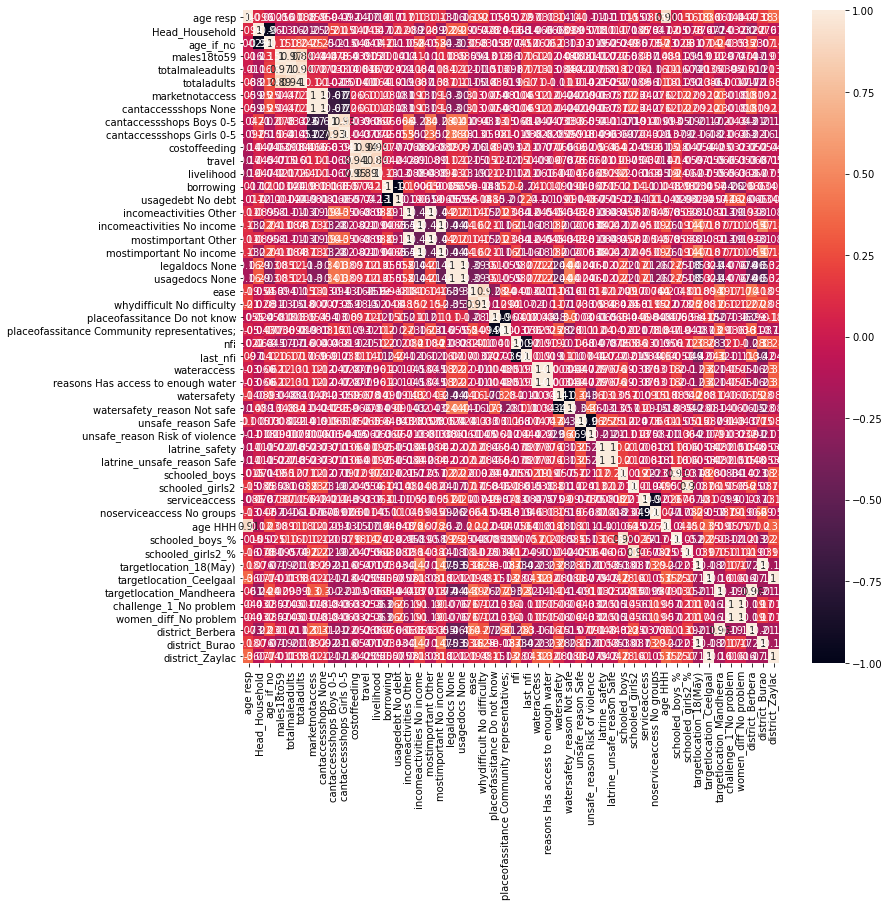

In [56]:
variables=[]
for i in df.columns.tolist():
    a=0
    for j in df.columns.tolist():
        if a==1:
            continue
        elif i!=j:
            if abs(st.pearsonr(df[i],df[j])[0])>0.9:
                variables.append(i)
                a=1

corr2=pd.DataFrame(index=variables)
for i in variables:
    L=[]
    for j in variables:
        L.append(st.pearsonr(df[i],df[j])[0])
    corr2[i]=np.array(L)
plt.figure(figsize=(12,12))
sn.heatmap(corr2, annot=True)
plt.show()

In [50]:
[i for i in df.columns if df[i].isna().sum()>0]

[]

In [51]:
df.drop(['section', 'vilage_Makal'],axis=1,inplace=True)

In [52]:
########################### On en est là ##############################################

# Extraction des corrélations

In [53]:
binaire=[i for i in df.columns if len(df[i].unique())==2 and set(df[i].unique()).issubset(set([0,1]))]
len(binaire)

77

In [54]:
df.columns

Index(['age', 'gender resp', 'Head_Household', 'marital', 'HH women',
       'HH girls', 'HH men', 'HH boys', 'HH children', 'HH total',
       ...
       'flee_reason_Conflict', 'hearnews_Community leaders/women groups',
       'hearnews_DRC staff', 'hearnews_Other (please specify)',
       'hearnews_Outreach activities/ posters', 'benficiaryresidence_Bentiu',
       'benficiaryresidence_Jamjang', 'benficiaryresidence_Malakal',
       'vilage_Ajuong Thok', 'vilage_Mankuai'],
      dtype='object', length=104)

In [55]:
parent=question['parent'].dropna()
parent.index

Index(['know_leader', 'CBPN_understand_role_explain', 'CBPN_works_explain',
       'satistaftion CBPN_explain', 'trust CBPN_explain',
       'satistaftion security_CBPN_explain', 'butchery_related_explain',
       'feel_leader_transp_explain', 'rlptcomm_explain',
       'target_right_explain'],
      dtype='object')

In [56]:
question['filter'].unique()

array([nan, 'protection', 'LH'], dtype=object)

In [57]:
parenting=[i for i in df.columns if '_'.join(i.split('_')[:-1]) in parent.index or i in parent.index]
parenting

['know_leader']

In [58]:
df

,age,gender resp,Head_Household,marital,HH women,HH girls,HH men,HH boys,HH children,HH total,...,flee_reason_Conflict,hearnews_Community leaders/women groups,hearnews_DRC staff,hearnews_Other (please specify),hearnews_Outreach activities/ posters,benficiaryresidence_Bentiu,benficiaryresidence_Jamjang,benficiaryresidence_Malakal,vilage_Ajuong Thok,vilage_Mankuai
UniqueID,,,,,,,,,,,,,,,,,,,,,
3,38,0,1,1.0,1,2,3,4,5,15,...,1,0,0,0,0,0,1,0,0,0
4,49,0,1,1.0,1,2,3,4,5,15,...,1,0,0,0,0,0,1,0,0,0
6,28,0,1,0.0,1,1,0,1,5,8,...,1,0,0,0,0,0,1,0,0,0
7,38,0,1,0.0,2,2,5,4,1,14,...,1,0,0,0,0,0,1,0,0,0
9,36,0,1,1.0,1,4,2,2,1,10,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,46,1,1,1.0,3,2,2,2,2,11,...,1,1,0,0,0,0,0,1,0,0
456,55,0,1,0.0,4,3,1,2,1,11,...,1,1,0,0,0,0,0,1,0,0
457,40,0,1,1.0,3,1,1,3,2,10,...,1,1,0,0,0,0,0,1,0,0


In [59]:
dfm=df[df['know_leader']==1]
dfm

,age,gender resp,Head_Household,marital,HH women,HH girls,HH men,HH boys,HH children,HH total,...,flee_reason_Conflict,hearnews_Community leaders/women groups,hearnews_DRC staff,hearnews_Other (please specify),hearnews_Outreach activities/ posters,benficiaryresidence_Bentiu,benficiaryresidence_Jamjang,benficiaryresidence_Malakal,vilage_Ajuong Thok,vilage_Mankuai
UniqueID,,,,,,,,,,,,,,,,,,,,,
3,38,0,1,1.0,1,2,3,4,5,15,...,1,0,0,0,0,0,1,0,0,0
4,49,0,1,1.0,1,2,3,4,5,15,...,1,0,0,0,0,0,1,0,0,0
15,59,0,1,0.0,2,1,0,1,2,6,...,1,0,0,0,0,0,1,0,0,0
16,37,0,1,0.0,2,1,1,1,3,8,...,1,0,0,0,0,0,1,0,0,0
17,20,0,0,0.0,4,2,0,1,3,10,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,46,1,1,1.0,3,2,2,2,2,11,...,1,1,0,0,0,0,0,1,0,0
456,55,0,1,0.0,4,3,1,2,1,11,...,1,1,0,0,0,0,0,1,0,0
457,40,0,1,1.0,3,1,1,3,2,10,...,1,1,0,0,0,0,0,1,0,0


In [60]:
question

Idquest,parent,type,Treatment,filter,question
UniqueID,NaN,NaN,NaN,NaN,UNIQUE ID
age,NaN,continue,NaN,NaN,A3) Age of respondent
gender resp,NaN,NaN,NaN,NaN,A4) Sex of respondent
howlong_years,NaN,NaN,drop,NaN,A6a) How long have you lived in this settlemen...
howlong_month,NaN,NaN,drop,NaN,A6b) How long have you lived in this settlemen...
...,...,...,...,...,...
vilage,NaN,NaN,dummy,NaN,Payam/Boma visited
section,NaN,NaN,to code,NaN,Section of response
gender HHH,NaN,NaN,NaN,NaN,Gender of the head of the household
income_per_member,NaN,continue,NaN,NaN,Monthly income per household member


In [61]:
LH=[i for i in df.columns if i in question.index and question.loc[i]['filter']=='LH']
Protec=[i for i in df.columns if i in question.index and question.loc[i]['filter']=='protection']
print(len(LH),len(Protec))

45 14


In [62]:
Protec

['CBPN_understand_role',
 'CBPN_works',
 'satistaftion CBPN',
 'trust CBPN',
 'satistaftion security_CBPN',
 'attended_CCCM',
 'participated_CMS',
 'trained_CCCM',
 'know_CCCM_agency',
 'feel_leader_transp',
 'rlptcomm',
 'lodged_complaint',
 'received_feedback',
 'comp_feed_mech_effect']

In [63]:
change=[i for i in df.columns if 'scale' in i or 'perception' in i]
change.remove('income_source_Small scale trade')
change

['scale income', 'scale foodsec', 'perception LH', 'perception food']

In [64]:
data['section']

UniqueID
3      1.0
4      1.0
6      1.0
7      1.0
9      1.0
      ... 
455    0.0
456    0.0
457    0.0
459    0.0
460    0.0
Name: section, Length: 401, dtype: float64

In [65]:
correl={}
for i in df.columns:
    #On sélectionne le bon modèle
    if i in binaire:
        gbr=GradientBoostingClassifier()
    else:
        gbr=GradientBoostingRegressor()
    
    if i in parenting:
        dfm=df[data2['residency']=='IDP'].copy()
        y=dfm[i]
        X=dfm.drop([i,'know_leader'],axis=1).copy()
    elif i in change:
        y=df[i]
        X=df.drop(change,axis=1).copy()
    elif i in LH:
        dfm=df[data['section']==1]
        y=dfm[i]
        X=dfm.drop([i]+Protec,axis=1).copy()
        if len(y.unique())==1:
            pass
    elif i in Protec:
        dfm=df[data['section']==0]
        y=dfm[i]
        X=dfm.drop([i]+LH,axis=1).copy()
        if len(y.unique())==1:
            pass
    else:    
        y=df[i]
        X=df.drop([i],axis=1).copy()
    
    gbr.fit(X,y)
    
    correl[i]=pd.DataFrame(gbr.feature_importances_,index=X.columns).sort_values(by=0,ascending=False).iloc[:10].index.tolist()
    print(i,correl[i])

age ['position longitude', 'Head_Household', 'educ', 'gender HHH', 'position latitude', 'HH girls', 'income_per_member', 'howlong', 'HH total', 'HH boys']
gender resp ['Head_Household', 'gender HHH', 'educ', 'position longitude', 'participated_CMS', 'vulnerable Unaccompanied or separated child', 'howlong', 'age', 'HH women', 'attended_CCCM']
Head_Household ['gender resp', 'age', 'gender HHH', 'income', 'HH boys', 'position longitude', 'hearnews_Community leaders/women groups', 'position latitude', 'HH total', 'hearnews_DRC staff']
marital ['HH men', 'age', 'position latitude', 'position longitude', 'gender HHH', 'HH total', 'income_per_member', 'scale income', 'howlong', 'income']
HH women ['HH total', 'age', 'position latitude', 'HH boys', 'HH children', 'position longitude', 'howlong', 'vulnerable Woman at risk', 'income_per_member', 'HH girls']
HH girls ['HH total', 'HH men', 'HH children', 'HH boys', 'age', 'HH women', 'trust CBPN', 'position latitude', 'position longitude', 'incom

C6 Other ['C6 No inkind', 'howlong', 'C6 Sugar', 'HH total', 'HH boys', 'C6 Gumboots', 'position latitude', 'HH children', 'C11 Other', 'vulnerable Woman at risk']
C9 Nocash ['cashassistance', 'C4 Farming Tools', 'income', 'income_per_member', 'howlong', 'C11 Shoes', 'know_leader', 'position longitude', 'position latitude', 'stopshopmarket']
cashassistance ['educ', 'C9 Open a business', 'C9 Buy food', 'income_per_member', 'vilage_Mankuai', 'income', 'C9 Nocash', 'member_EES', 'perception food', 'position latitude']
C9 Buy food ['cashassistance', 'C6 Sugar', 'howlong', 'position latitude', 'income_per_member', 'HH boys', 'perception LH', 'C13 Tailoring', 'educ', 'HH girls']
C9 Buy clothes ['cashassistance', 'income_source_Land cultivation', 'income_per_member', 'HH men', 'C11 Shoes', 'Head_Household', 'HH women', 'income', 'C11 Clothes', 'flee_reason_Conflict']
C9 Open a business ['cashassistance', 'howlong', 'HH total', 'position latitude', 'C13 No skill training', 'C13 Tailoring', 'C4

gender HHH ['gender resp', 'Head_Household', 'age', 'trained_CCCM', 'HH men', 'marital', 'position longitude', 'income_per_member', 'vulnerable Unaccompanied or separated child', 'C4 Farming Tools']
income_per_member ['HH total', 'income', 'position longitude', 'age', 'rlptcomm', 'C16 None', 'educ', 'position latitude', 'benficiaryresidence_Jamjang', 'howlong']
howlong ['position latitude', 'position longitude', 'period', 'income_per_member', 'vilage_Mankuai', 'member_SPC', 'perception food', 'perception LH', 'hearnews_Community leaders/women groups', 'age']
income_source_Aid ['income_source_Land cultivation', 'employment', 'income_source_Small scale trade', 'income_source_Other, please specify', 'income_source_Casual employment', 'position longitude', 'income_per_member', 'HH total', 'hearnews_Outreach activities/ posters', 'C13 No skill training']
income_source_Casual employment ['income_source_Small scale trade', 'income_source_Aid', 'HH total', 'income_source_Land cultivation', 'HH

In [66]:
categorical

['vulnerable Child at risk',
 'vulnerable Unaccompanied or separated child',
 'vulnerable Woman at risk',
 'vulnerable Older person at risk',
 'vulnerable Single parent or caregiver',
 'vulnerable Household with person with physical and mental disability e.g., blind, deaf.',
 'vulnerable Serious medical condition',
 'vulnerable Do not want to declare',
 'C1 No training',
 'C1 Training on good modern agricultural practices',
 'C1 Harvesting and post-harvesting handling',
 'C1 Harvesting and post-harvesting handling.1',
 'C1 Fertilizer application',
 'C1 Soil erosion control',
 'C1 Pest management',
 'C1 Accounting and trading',
 'C1 Other',
 'C4 Seedlings',
 'C4 Ferliser',
 'C4 Pesticides',
 'C4 Farming Tools',
 'C4 Other(Mostly Nothing)',
 'C6 No inkind',
 'C6 Gumboots',
 'C6 Sugar',
 'C6 Coffee',
 'C6 T-shirts',
 'C6 Other',
 'C9 Nocash',
 'C9 Buy food',
 'C9 Pay debts',
 'C9 Buy clothes',
 'C9 Buy medicine',
 'C9 Buy water',
 'C9 Buy fuel',
 'C9 Buy cooking gas',
 'C9 Pay school fees

In [67]:
cat_cols=list(set([i.split(' ')[0]+' ' for i in categorical]))
cat_cols

['C16 ',
 'C4 ',
 'C1 ',
 'C9 ',
 'C13 ',
 'C6 ',
 'C11 ',
 'position ',
 'vulnerable ']

In [68]:
for i in cat_cols:
    print('####################',i,'####################')
    print([k for k in df.columns if i in k])

#################### C16  ####################
['C16 Marketing', 'C16 None']
#################### C4  ####################
['C4 Seedlings', 'C4 Ferliser', 'C4 Farming Tools', 'C4 Other(Mostly Nothing)']
#################### C1  ####################
['C1 No training', 'C1 Training on good modern agricultural practices', 'C1 Harvesting and post-harvesting handling.1', 'C1 Fertilizer application']
#################### C9  ####################
['C9 Nocash', 'C9 Buy food', 'C9 Buy clothes', 'C9 Open a business']
#################### C13  ####################
['C13 No skill training', 'C13 Beadwork', 'C13 Crocheting', 'C13 Tailoring', 'C13 Hair plaiting', 'C13 Other']
#################### C6  ####################
['C6 No inkind', 'C6 Gumboots', 'C6 Sugar', 'C6 Coffee', 'C6 T-shirts', 'C6 Other']
#################### C11  ####################
['C11 no material support', 'C11 Shoes', 'C11 Mosquito nets', 'C11 Basins', 'C11 Jerry can', 'C11 Clothes', 'C11 Other']
#################### position  

In [69]:
for i in correl:
    for k in range(10):
        for feat in dummy+cat_cols:
            if feat in correl[i][k]:
                correl[i][k]=feat

In [70]:
#fusionnage des variables catégorielles des données des questions principales
#1/ je rassemble les données en une seule catégorie de donnée de cat_cols
for j in dummy+cat_cols:
    correl[j]=[]
    for i in correl:
        if i!=j and j in i:
            correl[j]+=correl[i]

In [71]:
finalkey=dummy+cat_cols
for i in correl:
    a=False
    for k in dummy+cat_cols:
        if k in i:
            a=True
    if not a:
        finalkey.append(i)
            

correl_final={i:correl[i] for i in finalkey}
print(len(correl_final))

61


In [72]:
from collections import Counter
for i in correl_final:
    print(i,[k[0] for k in Counter(correl_final[i]).most_common() if k[0]!=i][:10])

income_source ['position ', 'income_per_member', 'HH total', 'hearnews', 'employment', 'HH children', 'howlong', 'C13 ', 'HH girls', 'target_right']
flee_reason ['position ', 'period', 'C11 ', 'C4 ', 'C6 ', 'C16 ', 'cashassistance', 'know_leader', 'disp_times']
hearnews ['position ', 'howlong', 'CBPN_works', 'income_source', 'satistaftion security_CBPN', 'CBPN_understand_role', 'know_CCCM_agency', 'HH total', 'income', 'trained_CCCM']
benficiaryresidence ['position ', 'income_per_member', 'income', 'howlong', 'age', 'vulnerable ', 'employment', 'hearnews', 'HH men', 'educ']
vilage ['position ', 'C11 ', 'HH children', 'income', 'age', 'howlong', 'target_right', 'flee_reason', 'residency', 'HH women']
C16  ['perception LH', 'C13 ', 'howlong', 'cashassistance', 'age', 'C6 ', 'HH girls', 'income', 'vulnerable ', 'stopshopmarket']
C4  ['C1 ', 'position ', 'scale income', 'HH girls', 'HH total', 'vulnerable ', 'income', 'income_per_member', 'C6 ', 'age']
C1  ['position ', 'HH men', 'percepti

In [73]:
data2.vilage.value_counts()

Makal            262
Mankuai           27
Ajuong Thok       23
Pamir             20
Yoanyang          12
Panhiany          12
Chilaak            9
Jamjang            8
Pakur              6
Rubkona            5
Yoanyang           5
Kaljak             3
B,35,c3,p,12       1
B,55,c1,p5         1
Thator             1
Owach              1
B,44,c,1p,3        1
Riang              1
Eklass Atahir      1
B,41,c,7,p,7       1
Zone F             1
Name: vilage, dtype: int64

In [74]:
for i in correl_final:
    correl_final[i]=[k[0] for k in Counter(correl_final[i]).most_common() if k[0]!=i]

In [75]:
for i in correl_final:
    correl_final[i]=[k[0] for k in Counter(correl_final[i]).most_common() if k[0]!=i][:7]
    if len(correl_final[i])<7:
        print(i,correl_final[i])

In [76]:
correl_final

{'income_source': ['position ',
  'income_per_member',
  'HH total',
  'hearnews',
  'employment',
  'HH children',
  'howlong'],
 'flee_reason': ['position ',
  'period',
  'C11 ',
  'C4 ',
  'C6 ',
  'C16 ',
  'cashassistance'],
 'hearnews': ['position ',
  'howlong',
  'CBPN_works',
  'income_source',
  'satistaftion security_CBPN',
  'CBPN_understand_role',
  'know_CCCM_agency'],
 'benficiaryresidence': ['position ',
  'income_per_member',
  'income',
  'howlong',
  'age',
  'vulnerable ',
  'employment'],
 'vilage': ['position ',
  'C11 ',
  'HH children',
  'income',
  'age',
  'howlong',
  'target_right'],
 'C16 ': ['perception LH',
  'C13 ',
  'howlong',
  'cashassistance',
  'age',
  'C6 ',
  'HH girls'],
 'C4 ': ['C1 ',
  'position ',
  'scale income',
  'HH girls',
  'HH total',
  'vulnerable ',
  'income'],
 'C1 ': ['position ',
  'HH men',
  'perception LH',
  'income_per_member',
  'HH boys',
  'age',
  'C4 '],
 'C9 ': ['cashassistance',
  'position ',
  'income',
  'inco

In [77]:
for i in data.columns:
    if i not in data2.columns:
        data2[i]=data[i]

In [78]:
pd.DataFrame(correl_final).to_csv('./DashBoard/correlations.csv',sep='\t',index=None)
data2.to_csv('./DashBoard/viz.csv',sep='\t',index=None)

In [79]:
import pickle

In [80]:
text

['CBPN_role_general',
 'CBPN_members',
 'CBPN_role',
 'CBPN_understand_role_explain',
 'CBPN_works_explain',
 'satistaftion CBPN_explain',
 'trust CBPN_explain',
 'satistaftion security_CBPN_explain',
 'butchery_related_explain',
 'discussed_CCCM',
 'feel_leader_transp_explain',
 'rlptcomm_explain',
 'target_right_explain',
 'recomm1',
 'recomm2',
 'recomm3']

In [81]:
text[-4:]

['target_right_explain', 'recomm1', 'recomm2', 'recomm3']

In [82]:
pickle.dump( cont_feat, open( "./DashBoard/cont_feat.p", "wb" ) )
pickle.dump( dummy, open( "./DashBoard/dummy.p", "wb" ) )
pickle.dump( cat_cols, open( "./DashBoard/cat_cols.p", "wb" ) )
pickle.dump( text, open( "./DashBoard/text.p", "wb" ) )
pickle.dump( LH, open( "./DashBoard/LH.p", "wb" ) )
pickle.dump( Protec, open( "./DashBoard/Protec.p", "wb" ) )

In [83]:
data2['section'].unique()

array(['FSL+(Respondent profile and Overall perception)',
       'Protection&CCM+(Respondent profile and Overall perception)'],
      dtype=object)

In [84]:
cat_cols

['C16 ',
 'C4 ',
 'C1 ',
 'C9 ',
 'C13 ',
 'C6 ',
 'C11 ',
 'position ',
 'vulnerable ']

In [85]:
for i in catno:
    print(data2[i].unique())

[1 0]
[1 0]
[1 0]
[0 1]
[0 1]


In [86]:
[i for i in data2.columns if i[0]=='C']

['CBPN_role_general',
 'CBPN_members',
 'CBPN_role',
 'CBPN_understand_role',
 'CBPN_understand_role_explain',
 'CBPN_works',
 'CBPN_works_explain',
 'C1 No training',
 'C1 Training on good modern agricultural practices',
 'C1 Harvesting and post-harvesting handling',
 'C1 Harvesting and post-harvesting handling.1',
 'C1 Fertilizer application',
 'C1 Soil erosion control',
 'C1 Pest management',
 'C1 Accounting and trading',
 'C1 Other',
 'C4 Seedlings',
 'C4 Ferliser',
 'C4 Pesticides',
 'C4 Farming Tools',
 'C4 Other(Mostly Nothing)',
 'C6 No inkind',
 'C6 Gumboots',
 'C6 Sugar',
 'C6 Coffee',
 'C6 T-shirts',
 'C6 Other',
 'C9 Nocash',
 'C9 Buy food',
 'C9 Pay debts',
 'C9 Buy clothes',
 'C9 Buy medicine',
 'C9 Buy water',
 'C9 Buy fuel',
 'C9 Buy cooking gas',
 'C9 Pay school fees/buy uniform and school material',
 'C9 Open a business',
 'C9 Buy livestock',
 'C9 Buy agricultural inputs (seeds, tools, fodder, fertilizer etc.)',
 'C9 Savings',
 'C9 Transport',
 'C9 Pay rent/shelter',


In [87]:
text

['CBPN_role_general',
 'CBPN_members',
 'CBPN_role',
 'CBPN_understand_role_explain',
 'CBPN_works_explain',
 'satistaftion CBPN_explain',
 'trust CBPN_explain',
 'satistaftion security_CBPN_explain',
 'butchery_related_explain',
 'discussed_CCCM',
 'feel_leader_transp_explain',
 'rlptcomm_explain',
 'target_right_explain',
 'recomm1',
 'recomm2',
 'recomm3']

In [88]:
'CBPN_role_general' in data2.columns

True

# Shap et LGBM

In [89]:
dfm=df[data['section']==1].copy()
dfm.drop([i]+Protec,axis=1,inplace=True)

In [90]:
import lightgbm as lgb
import shap

In [91]:
dfm['temoin']=np.random.standard_normal(len(dfm))

(array([ 1.,  1.,  4.,  4.,  5., 10., 13., 12., 12., 10., 15.,  9., 16.,
        11.,  6.,  4.,  2.,  1.,  1.,  1.]),
 array([-2.34694752, -2.08698574, -1.82702397, -1.5670622 , -1.30710042,
        -1.04713865, -0.78717688, -0.5272151 , -0.26725333, -0.00729156,
         0.25267021,  0.51263199,  0.77259376,  1.03255553,  1.29251731,
         1.55247908,  1.81244085,  2.07240263,  2.3323644 ,  2.59232617,
         2.85228794]),
 <BarContainer object of 20 artists>)

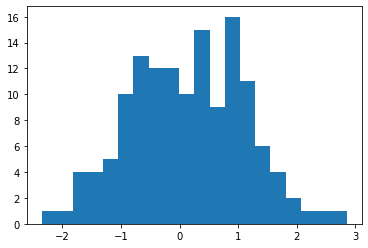

In [92]:
plt.hist(dfm['temoin'],bins=20)

In [93]:
lgbm=lgb.LGBMRegressor()
lgbm1=lgb.LGBMRegressor()
lgbm2=lgb.LGBMRegressor()
lgbm3=lgb.LGBMRegressor()

In [94]:
change

['scale income', 'scale foodsec', 'perception LH', 'perception food']

In [95]:
X=dfm[[i for i in dfm.columns if i not in change]].copy()
y=dfm[change[0]]
y1=dfm[change[1]]
y2=dfm[change[2]]
y3=dfm[change[3]]

In [96]:
lgbm.fit(X.values,y)
lgbm1.fit(X.values,y1)
lgbm2.fit(X.values,y2)
lgbm3.fit(X.values,y3)

LGBMRegressor()

In [97]:
explainer = shap.TreeExplainer(lgbm,data = X,feature_perturbation='interventional')
explainer1 = shap.TreeExplainer(lgbm1,data = X,feature_perturbation='interventional')
explainer2 = shap.TreeExplainer(lgbm2,data = X,feature_perturbation='interventional')
explainer3 = shap.TreeExplainer(lgbm3,data = X,feature_perturbation='interventional')

In [98]:
svalues=explainer.shap_values(X,y)
svalues1=explainer1.shap_values(X,y1)
svalues2=explainer2.shap_values(X,y2)
svalues3=explainer3.shap_values(X,y3)

In [126]:
a=X.columns
a

Index(['age', 'gender resp', 'Head_Household', 'marital', 'HH women',
       'HH girls', 'HH men', 'HH boys', 'HH children', 'HH total', 'educ',
       'employment', 'income', 'residency', 'period', 'disp_times',
       'know_leader', 'vulnerable Child at risk',
       'vulnerable Unaccompanied or separated child',
       'vulnerable Woman at risk', 'vulnerable Older person at risk',
       'vulnerable Single parent or caregiver',
       'vulnerable Household with person with physical and mental disability e.g., blind, deaf.',
       'vulnerable Serious medical condition', 'C1 No training',
       'C1 Training on good modern agricultural practices',
       'C1 Harvesting and post-harvesting handling.1',
       'C1 Fertilizer application', 'C4 Seedlings', 'C4 Ferliser',
       'C4 Farming Tools', 'C4 Other(Mostly Nothing)', 'C6 No inkind',
       'C6 Gumboots', 'C6 Sugar', 'C6 Coffee', 'C6 T-shirts', 'C6 Other',
       'C9 Nocash', 'cashassistance', 'C9 Buy food', 'C9 Buy clothes',
    

In [107]:
questions

NameError: name 'questions' is not defined

In [100]:
a=X.columns.tolist()
a

['age',
 'gender resp',
 'Head_Household',
 'marital',
 'HH women',
 'HH girls',
 'HH men',
 'HH boys',
 'HH children',
 'HH total',
 'educ',
 'employment',
 'income',
 'residency',
 'period',
 'disp_times',
 'know_leader',
 'vulnerable Child at risk',
 'vulnerable Unaccompanied or separated child',
 'vulnerable Woman at risk',
 'vulnerable Older person at risk',
 'vulnerable Single parent or caregiver',
 'vulnerable Household with person with physical and mental disability e.g., blind, deaf.',
 'vulnerable Serious medical condition',
 'C1 No training',
 'C1 Training on good modern agricultural practices',
 'C1 Harvesting and post-harvesting handling.1',
 'C1 Fertilizer application',
 'C4 Seedlings',
 'C4 Ferliser',
 'C4 Farming Tools',
 'C4 Other(Mostly Nothing)',
 'C6 No inkind',
 'C6 Gumboots',
 'C6 Sugar',
 'C6 Coffee',
 'C6 T-shirts',
 'C6 Other',
 'C9 Nocash',
 'cashassistance',
 'C9 Buy food',
 'C9 Buy clothes',
 'C9 Open a business',
 'C11 no material support',
 'C11 Shoes',
 '

In [109]:
feats=['position longitude', 'C13 No skill training', 'C9 Nocash', 'HH total', 'HH girls', 'HH women', 'income','income_per_member','member_SPC','C1 No training', 'HH children', 'know_leader','marital','cashassistance']

In [110]:
print(len(feats),len(real_names))

NameError: name 'real_names' is not defined

In [111]:
real_names=['Longitude','Did not receive any skills training','Did not receive Multipurpose Cash Assistance',\
           'Total number of persons in the household', 'Number of girls in the household (5-18)',\
           'Number of women in the household (18+)','Average monthly income','Income per household member',\
           'Member of Seed-Pressing Cooperative','Did not receive any agricultural training',\
           'Number of children in the household (<5)', 'Do you know your camp/block leader',\
           'Marital status','How much did you receive for cashassistance']

In [112]:
for i in range(14):
    print(feats[i],real_names[i])

position longitude Longitude
C13 No skill training Did not receive any skills training
C9 Nocash Did not receive Multipurpose Cash Assistance
HH total Total number of persons in the household
HH girls Number of girls in the household (5-18)
HH women Number of women in the household (18+)
income Average monthly income
income_per_member Income per household member
member_SPC Member of Seed-Pressing Cooperative
C1 No training Did not receive any agricultural training
HH children Number of children in the household (<5)
know_leader Do you know your camp/block leader
marital Marital status
cashassistance How much did you receive for cashassistance


In [113]:
for i in range(len(a)):
    if a[i] in feats:
        a[i]=real_names[feats.index(a[i])]

In [114]:
[question[3][i] for i in feats if i in question[3]]

KeyError: 3

In [103]:
change

['change income', 'change foodsec', 'change2 LH', 'change2 food_access']

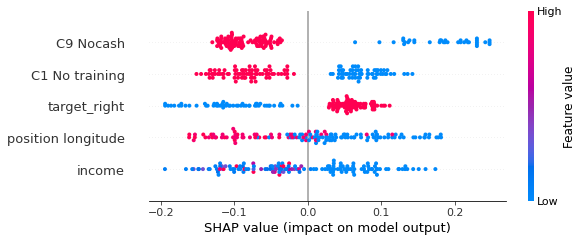

In [102]:

shap.summary_plot(svalues,X, feature_names=a,max_display=5)

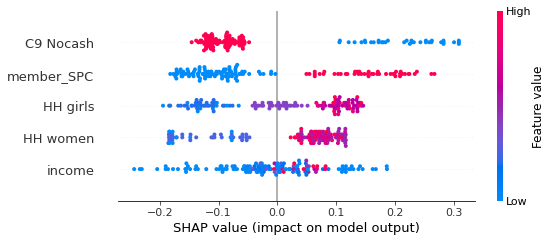

In [104]:

shap.summary_plot(svalues1,X, feature_names=a,max_display=5)

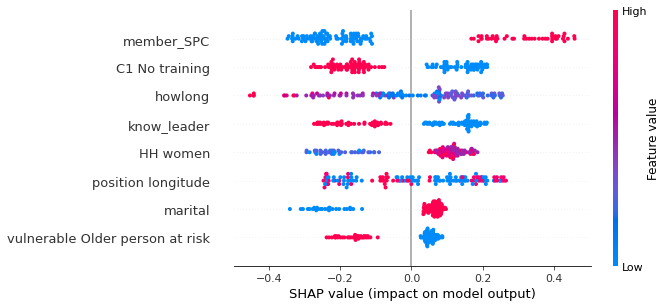

In [107]:
shap.summary_plot(svalues2,X, feature_names=a,max_display=8)

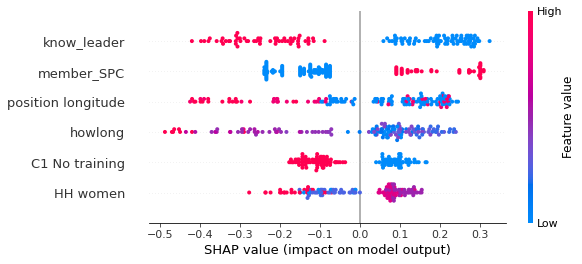

In [109]:
shap.summary_plot(svalues3,X, feature_names=a,max_display=6)

In [124]:
change

['change income', 'change foodsec', 'change2 LH', 'change2 food_access']

In [112]:
data2['region']

UniqueID
1      Ajuong Thok
2            Pamir
3            Pamir
4            Pamir
5            Pamir
          ...     
109    Ajuong Thok
110    Ajuong Thok
112    Ajuong Thok
117    Ajuong Thok
120    Ajuong Thok
Name: region, Length: 101, dtype: object

In [142]:
data['course']

UniqueID
1      Garment making (tailoring)
2      Garment making (tailoring)
3                    Leathercraft
4                    Leathercraft
5                       Furniture
                  ...            
109    Garment making (tailoring)
110         Literacy and numeracy
112    Garment making (tailoring)
117    Garment making (tailoring)
120                      Plumbing
Name: course, Length: 101, dtype: object

In [5]:
# Pydeck
df

,name,code,address,entries,exits,coordinates,exits_radius
0,Lafayette (LAFY),LF,"3601 Deer Hill Road, Lafayette CA 94549",3481,3616,"[-122.123801, 37.893394]",60.133186
1,12th St. Oakland City Center (12TH),12,"1245 Broadway, Oakland CA 94612",13418,13547,"[-122.271604, 37.803664]",116.391580
2,16th St. Mission (16TH),16,"2000 Mission Street, San Francisco CA 94110",12409,12351,"[-122.419694, 37.765062]",111.135053
3,19th St. Oakland (19TH),19,"1900 Broadway, Oakland CA 94612",13108,13090,"[-122.269029, 37.80787]",114.411538
4,24th St. Mission (24TH),24,"2800 Mission Street, San Francisco CA 94110",12817,12529,"[-122.418466, 37.752254]",111.933016
5,Ashby (ASHB),AS,"3100 Adeline Street, Berkeley CA 94703",5452,5341,"[-122.26978, 37.853024]",73.082146
6,Balboa Park (BALB),BP,"401 Geneva Avenue, San Francisco CA 94112",11170,9817,"[-122.447414, 37.721981]",99.080775
7,Bay Fair (BAYF),BF,"15242 Hesperian Blvd., San Leandro CA 94578",5564,5516,"[-122.126871, 37.697185]",74.269779
8,Castro Valley (CAST),CV,"3301 Norbridge Dr., Castro Valley CA 94546",2781,2735,"[-122.075567, 37.690754]",52.297227
9,Civic Center/UN Plaza (CIVC),CC,"1150 Market Street, San Francisco CA 94102",24798,22626,"[-122.413756, 37.779528]",150.419414


In [7]:
import pydeck as pdk
import pandas as pd
import math

SCATTERPLOT_LAYER_DATA = "https://raw.githubusercontent.com/visgl/deck.gl-data/master/website/bart-stations.json"
df = pd.read_json(SCATTERPLOT_LAYER_DATA)

# Use pandas to calculate additional data
df["exits_radius"] = df["exits"].apply(lambda exits_count: math.sqrt(exits_count))

# Define a layer to display on a map
layer = pdk.Layer(
    "ScatterplotLayer",
    df,
    #pickable=True,
    opacity=0.5,
    stroked=True,
    filled=True,
    radius_scale=6,
    radius_min_pixels=1,
    radius_max_pixels=100,
    line_width_min_pixels=1,
    get_position="coordinates",
    get_radius="exits_radius",
    get_fill_color=[255, 140, 0],
    get_line_color=[0, 0, 0],
)

# Set the viewport location
view_state = pdk.ViewState(latitude=37.7749295, longitude=-122.4194155, zoom=10, bearing=0, pitch=0)

# Render
r = pdk.Deck(layers=[layer], initial_view_state=view_state, tooltip={"text": "{name}\n{address}"})
r.to_html("scatterplot_layer.html")

/home/samuel/anaconda3/lib/python3.8/site-packages/pydeck/bindings/deck.py:105: UserWarning: Mapbox API key is not set. This may impact available features of pydeck.
  warnings.warn(


# Autre


In [61]:
test=pd.read_csv('./DashBoard/codes.csv',index_col=None,sep='\t')

In [62]:
test[test['list name']=='housing']

,list name,name,label,coding,color


In [63]:
test.dropna(how='any',subset=['color'])

,list name,name,label,coding,color
25,marital,1.0,Married,1.0,Green
26,marital,2.0,Single,0.0,Yellow
27,marital,3.0,Divorced,0.0,Blue
28,marital,4.0,Widowed,0.0,Grey
29,educ,1.0,Some Primary,1.0,darkred
30,educ,2.0,Completed primary,1.5,red
31,educ,3.0,Some secondary,2.0,orange
32,educ,4.0,Completed secondary,2.5,Yellow
33,educ,5.0,Some university,3.0,lightgreen
34,educ,6.0,Completed university,3.5,green


In [64]:
codes=test.dropna(how='any',subset=['color'])

In [65]:
codes[codes['list name']=='housing']

,list name,name,label,coding,color


In [66]:
codes.head()

,list name,name,label,coding,color
25,marital,1.0,Married,1.0,Green
26,marital,2.0,Single,0.0,Yellow
27,marital,3.0,Divorced,0.0,Blue
28,marital,4.0,Widowed,0.0,Grey
29,educ,1.0,Some Primary,1.0,darkred


In [67]:
q1='residency'
q2='housing'

In [68]:
if q2.split(' ')[0] in codes['list name'].values:
    print('coucou')
    colors=codes[codes['list name']==q2.split(' ')[0]]

In [69]:
colors

UsageError: %colors: you must specify a color scheme. See '%colors?'


In [ ]:
colors['label'].tolist()

In [ ]:
q2

In [ ]:
agg=data2[[q2,q1]].groupby(by=[q2,q1]).aggregate({q2:'count'}).unstack().fillna(0)
labels=colors['label'].tolist()
colors=colors['color'].tolist()
q2

In [ ]:
agg.loc[labels[0]]

In [ ]:
def count2(abscisse,ordonnée,data):
    
    agg=data2[[abscisse,ordonnée]].groupby(by=[abscisse,ordonnée]).aggregate({abscisse:'count'}).unstack().fillna(0)
    agg2=agg.T/agg.T.sum()
    agg2=agg2.T.round(2)*100
    x=agg.index
    
    if ordonnée.split(' ')[0] in codes['list name'].values:
        colors_code=codes[codes['list name']==ordonnée.split(' ')[0]].sort_values(['coding'])
        labels=colors_code['label'].tolist()
        colors=colors_code['color'].tolist()
        fig = go.Figure()
        print(labels)
        for i in range(len(labels)):
            if labels[i] in data[ordonnée].unique():
                fig.add_trace(go.Bar(x=x, y=agg[(abscisse,labels[i])], name=labels[i],\
                           marker_color=colors[i].lower(),customdata=agg2[(abscisse,labels[i])],textposition="inside",\
                           texttemplate="%{customdata} %",textfont_color="black"))
        
    else:
        fig = go.Figure(go.Bar(x=x, y=agg.iloc[:,0], name=agg.columns.tolist()[0][1],marker_color='green'))
        for i in range(len(agg.columns)-1):
            fig.add_trace(go.Bar(x=x, y=agg.iloc[:,i+1], name=agg.columns.tolist()[i+1][1]))
    
    fig.update_layout(barmode='relative', \
                  xaxis={'title':'<b>'+abscisse+'<b>','title_font':{'size':18}},\
                  yaxis={'title':'Pourcentage','title_font':{'size':18}})
    fig.update_layout(legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1.65,font=dict(size=18),title=dict(font=dict(size=18))
    ))
    fig.update_layout(title_text='test')
    
    return fig.show()


In [ ]:
def pourcent2(abscisse,ordonnée,data):
    
    agg2=data2[[abscisse,ordonnée]].groupby(by=[abscisse,ordonnée]).aggregate({abscisse:'count'}).unstack().fillna(0)
    agg=agg2.T/agg2.T.sum()
    agg=agg.T.round(2)*100
    x=agg2.index
    
    if ordonnée.split(' ')[0] in codes['list name'].values:
        colors_code=codes[codes['list name']==ordonnée.split(' ')[0]].sort_values(['coding'])
        labels=colors_code['label'].tolist()
        colors=colors_code['color'].tolist()
        fig = go.Figure()
        print(labels)
        for i in range(len(labels)):
            if labels[i] in data[ordonnée].unique():
                fig.add_trace(go.Bar(x=x, y=agg[(abscisse,labels[i])], name=labels[i],\
                           marker_color=colors[i].lower(),customdata=agg2[(abscisse,labels[i])],textposition="inside",\
                           texttemplate="%{customdata} people",textfont_color="black"))
        
    else:
        fig = go.Figure(go.Bar(x=x, y=agg.iloc[:,0], name=agg.columns.tolist()[0][1],marker_color='green'))
        for i in range(len(agg.columns)-1):
            fig.add_trace(go.Bar(x=x, y=agg.iloc[:,i+1], name=agg.columns.tolist()[i+1][1]))
    
    fig.update_layout(barmode='relative', \
                  xaxis={'title':'<b>'+abscisse+'<b>','title_font':{'size':18}},\
                  yaxis={'title':'Pourcentage','title_font':{'size':18}})
    fig.update_layout(legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1.65,font=dict(size=18),title=dict(font=dict(size=18))
    ))
    fig.update_layout(title_text='test')
    
    return fig.show()

In [ ]:
data2[ordonnée].unique()

In [ ]:
abscisse='FCS'
ordonnée='assistancetype'
agg=data2[[abscisse,ordonnée]].groupby(by=[abscisse,ordonnée]).aggregate({abscisse:'count'}).unstack().fillna(0)

In [ ]:
agg

In [ ]:
agg.columns[0]

In [ ]:
colors_code

In [ ]:
colors_code=codes[codes['list name']==ordonnée.split(' ')[0]].sort_values(['coding'])
labels=colors_code['label'].tolist()
colors=colors_code['color'].tolist()

In [ ]:
agg[(q1,labels[0])]

In [ ]:
agg=data2[[q1,q2]].groupby(by=[q1,q2]).aggregate({q1:'count'}).unstack().fillna(0)
agg

In [ ]:
agg2=agg.T/agg.T.sum()
agg2=agg2.T*100
agg2

In [ ]:
count2('FCS','assistancetype',data2)

In [ ]:
pourcent2(q1,q2,data2)

In [ ]:
#q1 ordonnée et q2 abcisse

agg=data2[[q2,q1]].groupby(by=[q2,q1]).aggregate({q2:'count'}).unstack().fillna(0)
agg2=agg.T/agg.T.sum()
agg2=agg2.T*100
x=agg.index
fig = go.Figure(go.Bar(x=x, y=agg2[(q2,'Poor')], name='Poor',\
                       marker_color='#F75D59',customdata=agg[(q2,'Poor')],textposition="inside",\
                       texttemplate="%{customdata} persons",textfont_color="black"))
fig.add_trace(go.Bar(x=x, y=agg2[(q2,'Borderline')], name='Borderline',\
                     marker_color='lightgreen',customdata=agg[(q2,'Borderline')],textposition="inside",\
                     texttemplate="%{customdata} persons",textfont_color="black"))
fig.add_trace(go.Bar(x=x, y=agg2[(q2,'Acceptable')], name='Acceptable',\
                     marker_color='#478800',customdata=agg[(q2,'Acceptable')],textposition="inside",\
                     texttemplate="%{customdata} persons",textfont_color="black"))

fig.update_layout(barmode='relative', \
                  xaxis={'title':'<b>'+questions[q2][4:]+'<b>','title_font':{'size':18}},\
                  yaxis={'title':'Pourcentage','title_font':{'size':18}})
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=0.5,font=dict(size=18),title=dict(font=dict(size=18))
))
fig.update_layout(title_text=questions[q1])
fig.show()

In [ ]:
a=4
b=3 if a==2 else 1
b

In [ ]:
DATA_URL = "https://raw.githubusercontent.com/visgl/deck.gl-data/master/examples/geojson/vancouver-blocks.json"
json = pd.read_json(DATA_URL)
df = pd.DataFrame()

In [ ]:
df["coordinates"] = json["features"].apply(lambda row: row["geometry"]["coordinates"])

In [ ]:
df["coordinates"][0]

In [3]:
names=['2','1','3','4']
print(names[-2][-1])

3
